<a href="https://colab.research.google.com/github/GirishNaik711/Rental_Bikes_Dataset/blob/main/UCI_Rental_Bikes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import copy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData1.csv").drop(["Date","Holiday","Seasons"], axis = 1)

In [ ]:
df.columns = dataset_cols
df["functional"] = (df["functional"]=="yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


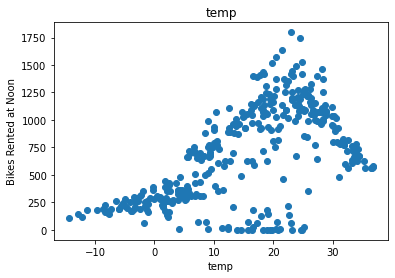

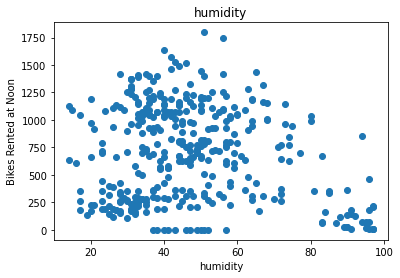

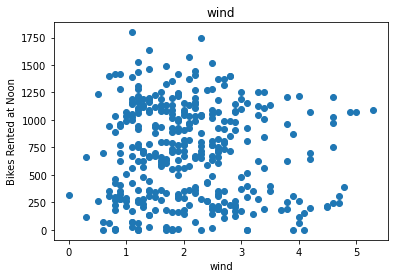

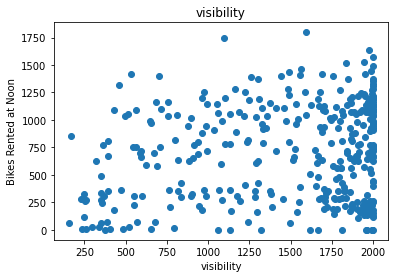

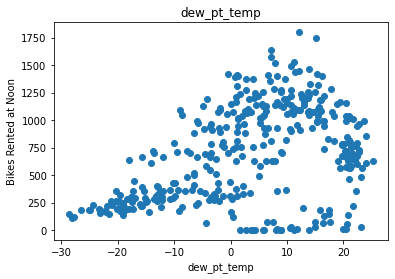

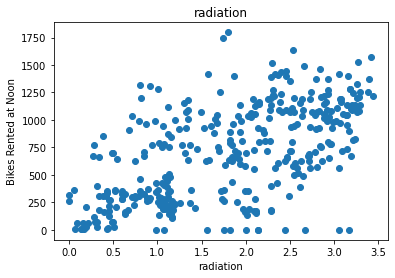

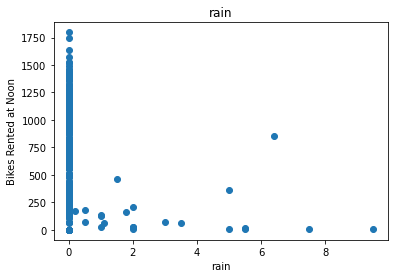

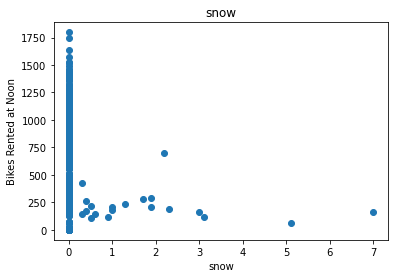

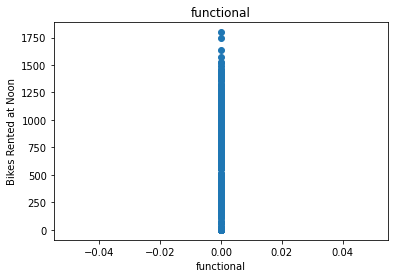

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Bikes Rented at Noon")
  plt.show()

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis=1)


In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
Train, Valid, Test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)

  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels)==1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)

  data = np.hstack((x,y))

  return data, x, y


In [ ]:
dt, x_train_temp, y_train_temp = get_xy(Train, "bike_count", x_labels = ["temp"])
dt, x_valid_temp, y_valid_temp = get_xy(Valid, "bike_count", x_labels = ["temp"])
dt, x_test_temp, y_test_temp = get_xy(Test, "bike_count", x_labels = ["temp"])

#Linear Regression

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.44594127]] [344.42739805]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.36222581069011583

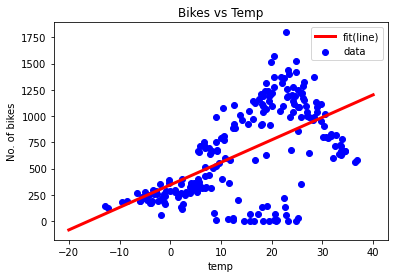

In [ ]:
plt.scatter(x_train_temp,y_train_temp, label = "data", color = 'blue')
x = tf.linspace(-20,40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='fit(line)', color = 'red', linewidth = 3)
plt.title("Bikes vs Temp")
plt.legend()
plt.ylabel("No. of bikes")
plt.xlabel("temp")
plt.show()

#Multiple Linear Regression

In [ ]:
dt, x_train_all, y_train_all = get_xy(Train, "bike_count", x_labels =df.columns[1:])
dt, x_valid_all, y_valid_all = get_xy(Valid, "bike_count", x_labels = df.columns[1:])
dt, x_test_all, y_test_all = get_xy(Test, "bike_count", x_labels = df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.42871033846407314

#Nueral Network

In [ ]:
def plot(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(x_train_temp)

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [ ]:
history = temp_nn_model.fit(x_train_temp.reshape(-1),y_train_temp,
                  verbose=0,
                  epochs=1000,
                  validation_data=(x_valid_temp,y_valid_temp))

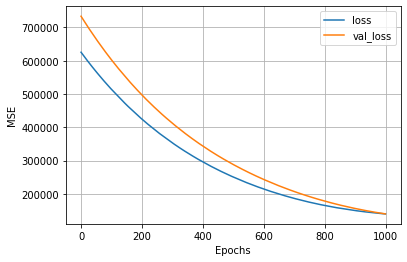

In [ ]:
plot(history)

4/4 [==============================] - 0s 2ms/step


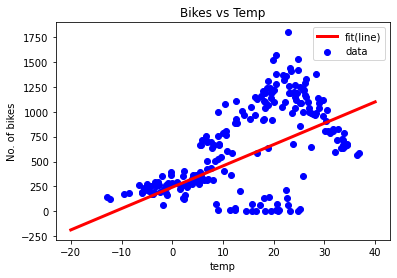

In [ ]:
plt.scatter(x_train_temp,y_train_temp, label = "data", color = 'blue')
x = tf.linspace(-20,40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='fit(line)', color = 'red', linewidth = 3)
plt.title("Bikes vs Temp")
plt.legend()
plt.ylabel("No. of bikes")
plt.xlabel("temp")
plt.show()

#Home Work

In [ ]:
dt, x_train_temp, y_train_temp = get_xy(Train, "bike_count", x_labels = ["temp"])
dt, x_valid_temp, y_valid_temp = get_xy(Valid, "bike_count", x_labels = ["temp"])
dt, x_test_temp, y_test_temp = get_xy(Test, "bike_count", x_labels = ["temp"])

In [ ]:
dt, x_train_all, y_train_all = get_xy(Train, "bike_count", x_labels =df.columns[1:])
dt, x_valid_all, y_valid_all = get_xy(Valid, "bike_count", x_labels = df.columns[1:])
dt, x_test_all, y_test_all = get_xy(Test, "bike_count", x_labels = df.columns[1:])

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,1), axis = -1)
all_normalizer.adapt(x_train_all)

In [ ]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
all_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "mean_squared_error")

In [ ]:
history = all_nn_model.fit(x_train_all,y_train_all,
                  verbose=0,
                  epochs=100, batch_size = 15,
                  validation_data=(x_valid_all,y_valid_all))

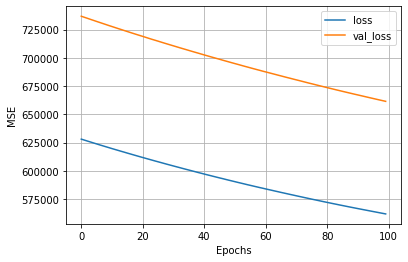

In [ ]:
plot(history)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = abs(all_nn_model.predict(x_test_all,).reshape(-1,1).round())

3/3 [==============================] - 0s 2ms/step


In [ ]:
#Home Work: A+ for the efforts and Knowledge potrayed, but for now the results were'nt achieved as much as wanted, SO Moving On....

#A Real Nueral Net with just the Temp feature

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp)

In [ ]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1),
])

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(x_train_temp, y_train_temp,
                       verbose=0,
                       epochs=100,
                       validation_data=(x_valid_temp, y_valid_temp))

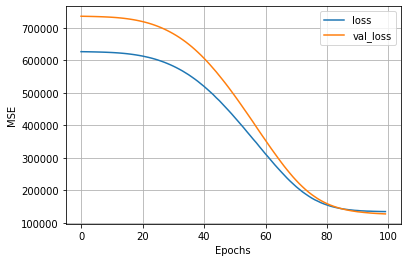

In [ ]:
plot(history)

4/4 [==============================] - 0s 2ms/step


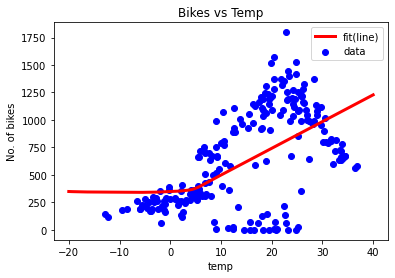

In [ ]:
plt.scatter(x_train_temp,y_train_temp, label = "data", color = 'blue')
x = tf.linspace(-20,40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='fit(line)', color = 'red', linewidth = 3)
plt.title("Bikes vs Temp")
plt.legend()
plt.ylabel("No. of bikes")
plt.xlabel("temp")
plt.show()

#A real Nueral Net with all Features

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = -1)
all_normalizer.adapt(x_train_all)

In [ ]:
nn_model_all = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model_all.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

In [ ]:
history = nn_model_all.fit(x_train_all, y_train_all,
                       verbose=0,
                       epochs=100,
                       validation_data=(x_valid_all, y_valid_all))

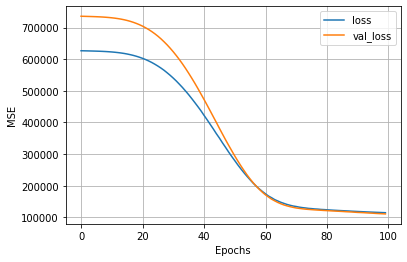

In [ ]:
plot(history)

In [ ]:
y_pred_mlr = all_reg.predict(x_test_all)
y_pred_nn = nn_model_all.predict(x_test_all)

3/3 [==============================] - 0s 3ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_mlr, y_test_all)

108153.42965411887

In [ ]:
MSE(y_pred_nn, y_test_all)

131900.92124978962

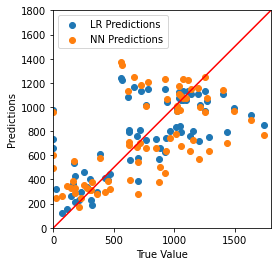

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_mlr, label = 'LR Predictions')
plt.scatter(y_test_all, y_pred_nn, label = 'NN Predictions')
plt.xlabel("True Value")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims,lims,c='red')